In [1]:
from PIL import Image
from pylab import *
import matplotlib.pyplot as plt
import numpy as np
import scipy.fft

In [2]:
def dct2(a):
    return scipy.fft.dct( scipy.fft.dct( a, axis=0, norm='ortho' ), axis=1, norm='ortho' )

def idct2(a):
    return scipy.fft.idct( scipy.fft.idct( a, axis=0 , norm='ortho'), axis=1 , norm='ortho')

In [3]:
#define quantization arrays
Q10 = np.array([[80,60,50,80,120,200,255,255],
                [55,60,70,95,130,255,255,255],
                [70,65,80,120,200,255,255,255],
                [70,85,110,145,255,255,255,255],
                [90,110,185,255,255,255,255,255],
                [120,175,255,255,255,255,255,255],
                [245,255,255,255,255,255,255,255],
                [255,255,255,255,255,255,255,255]])

Q50 = np.array([[16,11,10,16,24,40,51,61],
            [12,12,14,19,26,58,60,55],
            [14,13,16,24,40,57,69,56],
            [14,17,22,29,51,87,80,62],
            [18,22,37,56,68,109,103,77],
            [24,35,55,64,81,104,113,92],
            [49,64,78,87,103,121,120,101],
            [72,92,95,98,112,100,130,99]])

Q90 = np.array([[3,2,2,3,5,8,10,12],
                [2,2,3,4,5,12,12,11],
                [3,3,3,5,8,11,14,11],
                [3,3,4,6,10,17,16,12],
                [4,4,7,11,14,22,21,15],
                [5,7,11,13,16,12,23,18],
                [10,13,16,17,21,24,24,21],
                [14,18,19,20,22,20,20,20]])

In [4]:
i = 11
j = 63

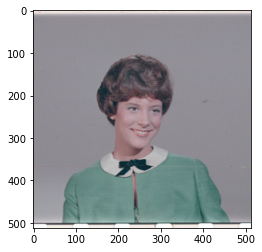

In [5]:
im_rgb = Image.open('database/4.1.03.tif') #képobjektum
im_array = np.array(im_rgb)
plt.imshow(im_array)

In [6]:
R = im_array[:,:,0]
G = im_array[:,:,1]
B = im_array[:,:,2]

Y=16+65.738*R/256+129.057*G/256+25.064*B/256
Cb=128-37.945*R/256-74.494*G/256+112.439*B/256 
Cr=128+112.439*R/256-94.154*G/256-18.285*B/256

Text(0.5, 1.0, 'Y - luma')

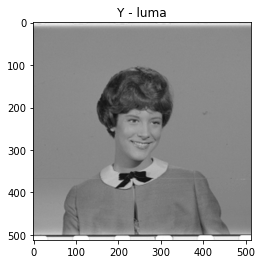

In [7]:
plt.imshow(Y, 'gray')
plt.title('Y - luma')

Text(0.5, 1.0, 'Cb')

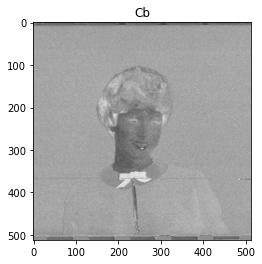

In [8]:
plt.imshow(Cb, 'gray')
plt.title('Cb')

Text(0.5, 1.0, 'Cr')

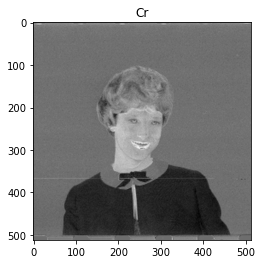

In [9]:
plt.imshow(Cr, 'gray')
plt.title('Cr')

In [10]:
Y[i*8:i*8+8,j*8:j*8+8]

array([[142.2325625 , 141.97577344, 140.51491406, 139.40875   ,
        140.26757422, 141.72843359, 141.98522266, 141.48109375],
       [141.72843359, 140.61282031, 139.91287891, 140.01078516,
        140.01078516, 140.86960937, 140.77170312, 140.52436328],
       [140.46338672, 139.40875   , 140.01078516, 141.21485547,
        140.4539375 , 139.24986719, 139.15196094, 139.91287891],
       [140.86960937, 139.91287891, 140.61282031, 141.66745703,
        141.41066797, 140.10869141, 139.15196094, 139.91287891],
       [141.27583203, 141.11694922, 141.56955078, 142.27894141,
        142.27894141, 141.82633984, 140.86960937, 140.51491406],
       [141.02849219, 141.37373828, 141.56955078, 142.27894141,
        142.27894141, 141.82633984, 141.22430469, 141.11694922],
       [140.62226953, 141.12639844, 141.47164453, 141.56955078,
        141.06542187, 141.22430469, 141.22430469, 141.47164453],
       [140.72017578, 141.12639844, 140.86960937, 141.21485547,
        140.96751563, 141.1263984

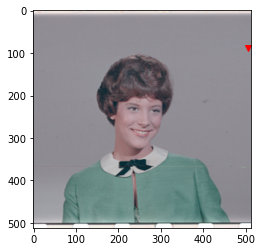

In [11]:
plt.plot(j*8, i*8, marker='v', color="red")
plt.imshow(im_rgb)
plt.show()

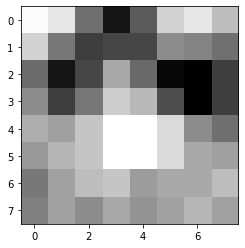

In [12]:
plt.imshow(Y[i*8:i*8+8,j*8:j*8+8], 'gray')

In [13]:
# 8x8-as blokkokra bontás
no_y = np.uint8(im_rgb.height/8)
no_x = np.uint8(im_rgb.width/8)
no_y, no_x

(64, 64)

In [14]:
sliced_Y = np.zeros((no_y, no_x, 8, 8))
DCT_Y = np.zeros((no_y, no_x, 8, 8))
DCT_Y_Q10 = np.zeros((no_y, no_x, 8, 8))
DCT_Y_Q90 = np.zeros((no_y, no_x, 8, 8))
sliced_Y.size

262144

In [15]:
for x in range(1, no_x+1):
    for y in range(1, no_y+1):
        sliced_Y[x-1, y-1, :, :] = Y[(x-1)*8 : (x-1)*8+8, (y-1)*8 : (y-1)*8+8] -127 #leskálázás, hogy 0 körül legyen, így tudjuk elvégezni a DCT-t
        DCT_Y[x-1,y-1,:,:] = dct2(sliced_Y[x-1,y-1])
        DCT_Y_Q10[x-1,y-1,:,:] = np.int16(DCT_Y[x-1,y-1]/Q10) #kvantálás
        DCT_Y_Q90[x-1,y-1,:,:] = np.int16(DCT_Y[x-1,y-1]/Q90)

In [16]:
sliced_Y[i,j], Y[i*8:i*8+8,(j-0)*8:(j-0)*8+8]-127

(array([[15.2325625 , 14.97577344, 13.51491406, 12.40875   , 13.26757422,
         14.72843359, 14.98522266, 14.48109375],
        [14.72843359, 13.61282031, 12.91287891, 13.01078516, 13.01078516,
         13.86960937, 13.77170312, 13.52436328],
        [13.46338672, 12.40875   , 13.01078516, 14.21485547, 13.4539375 ,
         12.24986719, 12.15196094, 12.91287891],
        [13.86960937, 12.91287891, 13.61282031, 14.66745703, 14.41066797,
         13.10869141, 12.15196094, 12.91287891],
        [14.27583203, 14.11694922, 14.56955078, 15.27894141, 15.27894141,
         14.82633984, 13.86960937, 13.51491406],
        [14.02849219, 14.37373828, 14.56955078, 15.27894141, 15.27894141,
         14.82633984, 14.22430469, 14.11694922],
        [13.62226953, 14.12639844, 14.47164453, 14.56955078, 14.06542187,
         14.22430469, 14.22430469, 14.47164453],
        [13.72017578, 14.12639844, 13.86960937, 14.21485547, 13.96751563,
         14.12639844, 14.3831875 , 14.12639844]]),
 array([[15.23

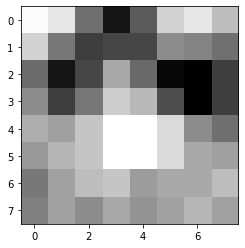

In [17]:
plt.imshow(sliced_Y[i,j], 'gray')

In [18]:
DCT_Y_Q10[i,j] , DCT_Y_Q90[i,j]

(array([[1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]]),
 array([[37.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [-1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]]))

In [19]:
np.sum(DCT_Y_Q10[i,j]==0)/64*100, np.sum(DCT_Y_Q90[i,j]==0)/64*100, np.sum(DCT_Y[i,j]==0)/64*100

(98.4375, 95.3125, 0.0)

In [20]:
# 0-k aránya az egész képhez
np.sum(DCT_Y_Q10[:,:]==0)/DCT_Y_Q10.size*100, np.sum(DCT_Y_Q90[:,:]==0)/DCT_Y_Q90.size*100, np.sum(DCT_Y[:,:]==0)/DCT_Y.size*100

(98.47259521484375, 91.88385009765625, 0.11749267578125)

In [21]:
Y_inv = np.zeros((im_rgb.height, im_rgb.width))
for x in range(1, no_x+1):
    for y in range(1,no_y+1):
        Y_inv[(x-1)*8 : (x-1)*8+8, (y-1)*8 : (y-1)*8+8] = idct2(DCT_Y_Q90[x-1,y-1,:,:] * Q90) +127

In [22]:
Y_inv[i*8:i*8+8,j*8:j*8+8], Y[i*8:i*8+8,j*8:j*8+8]

(array([[140.96919339, 140.96919339, 140.96919339, 140.96919339,
         140.96919339, 140.96919339, 140.96919339, 140.96919339],
        [140.47756883, 140.47756883, 140.47756883, 140.47756883,
         140.47756883, 140.47756883, 140.47756883, 140.47756883],
        [140.15843632, 140.15843632, 140.15843632, 140.15843632,
         140.15843632, 140.15843632, 140.15843632, 140.15843632],
        [140.51138955, 140.51138955, 140.51138955, 140.51138955,
         140.51138955, 140.51138955, 140.51138955, 140.51138955],
        [141.23861045, 141.23861045, 141.23861045, 141.23861045,
         141.23861045, 141.23861045, 141.23861045, 141.23861045],
        [141.59156368, 141.59156368, 141.59156368, 141.59156368,
         141.59156368, 141.59156368, 141.59156368, 141.59156368],
        [141.27243117, 141.27243117, 141.27243117, 141.27243117,
         141.27243117, 141.27243117, 141.27243117, 141.27243117],
        [140.78080661, 140.78080661, 140.78080661, 140.78080661,
         140.78080

Text(0.5, 1.0, 'Y_inv')

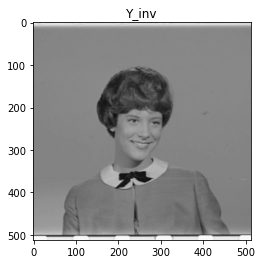

In [23]:
plt.imshow(Y_inv, 'gray')
plt.title('Y_inv')

In [24]:
# átlagos eltérés
np.mean(abs(Y-Y_inv))

0.7023526365622497